# Linear Regression

## Multiple linear regression

### Data description and analysis

<b> The Boston Housing Dataset: </b> the Boston Housing Dataset is derived from information collected by the U.S. Census Service regarding housing in the Boston, Massachusetts area. It aims to predict house prices based on various characteristics. 

<div class="alert alert-block alert-danger">
    
1. Import the Boston Housing dataset.
2. Display the correlation matrix and select only the highly correlated features with the label (MEDV feature) using a threshold value of 0.6.
3. Verify if the selected features represent a linear relationship with the target variable based on a 3D plot.
4. Split the generated dataset.
5. Normalize the data (excluding the label) using the min max scaler strategy.


<div/>

### 1. Import the Boston Housing dataset.

In [2]:
import pandas as pd
df = pd.read_csv("HousingData.csv")
print(df.head())
print(df.shape)
print(df.info())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null

### 2. Display the correlation matrix and select only the highly correlated features with the label (MEDV feature) using a threshold value of 0.6.


In [3]:
correlation_matrix = df.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


In [4]:
# correlation_matrix['the row to extract from']['the boolean mask']
high_corr_features = correlation_matrix['MEDV'][abs(correlation_matrix['MEDV']) >= 0.6]
print(high_corr_features)

RM       0.695360
LSTAT   -0.735822
MEDV     1.000000
Name: MEDV, dtype: float64


we notice that RM and LSTAT are highly correlated with MEDV

### 3. Verify if the selected features represent a linear relationship with the target variable based on a 3D plot.

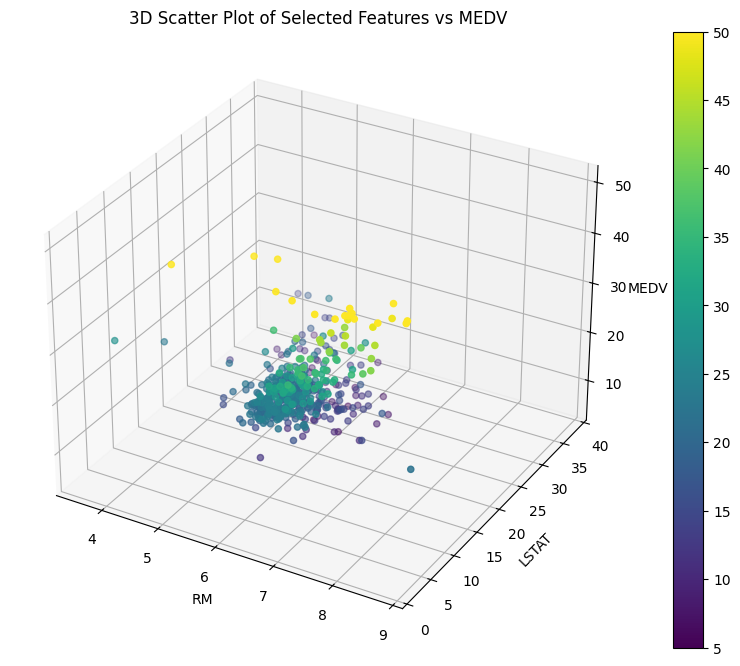

In [5]:
import matplotlib.pyplot as plt

selected_features = high_corr_features.index.tolist() # get just index that is features names...
selected_features.remove('MEDV')  
X = df[selected_features]
y = df['MEDV']

# len function to count the number of items inside of the selected_features list 
if len(selected_features) >= 2:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(X[selected_features[0]], 
                        X[selected_features[1]], 
                        y,
                        c=y, # => just to color the points and veausulize easily
                        cmap='viridis')
    
    ax.set_xlabel(selected_features[0])
    ax.set_ylabel(selected_features[1])
    ax.set_zlabel('MEDV')
    plt.colorbar(scatter)
    plt.title('3D Scatter Plot of Selected Features vs MEDV')
    plt.tight_layout # just give pading to not overlap the content
    plt.show()

We must first handle with missing values:

In [6]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
for feature in df.columns:
    df[feature] = df[feature].fillna(df[feature].mean())
df.isna().sum()    

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 4. Split the generated dataset.

In [8]:
from sklearn.model_selection import train_test_split
X = df[['RM', 'LSTAT']]
Y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# if we don't do random_state each time we run the code the spilitting data will change everytime and in the reality we need the same data so that the model learn properly 

### 5. Normalize the data (excluding the label) using the min max scaler strategy.


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit and transform to calc the min max and then scale data
X_test_scaled = scaler.transform(X_test) # we have calculate the min and max of the training data so we need just to scale data without re-calc again

print("\n the normlisation of scaled training data:")
print(X_train_scaled[:5])


 the normlisation of scaled training data:
[[0.29306488 0.63962472]
 [0.40085418 0.18598234]
 [0.44091926 0.1683223 ]
 [0.45556233 0.59492274]
 [0.37909294 0.26352097]]


### Data training and evaluation

<div class="alert alert-block alert-danger">
    
1. Use the following lines of code to perform training on the Boston Housing dataset.

<div/>

In [23]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.0001,max_iter=1000,verbose=1) # eta0 = alpha = learning rate

<div class="alert alert-block alert-danger">

2. Display the convergence graph of the trained model (where x represents the iterations and y is the loss).
3. Vary the learning rate value (0.01, 0.001, 0.0001). By comparing the convergence graphs for each model, what do you observe in terms of convergence and results?
4. Why does the graph not reach the maximum number of iterations when
using the 0.01 learning rate? Which variable controls this behavior?
5. Display the performance of the generated models on the test set based on the following metrics: MAE, MSE, RMSE, and R-squared. Select the best model based on these metrics.
6. Plot the generated plane of the best model and the scaled training data in one 3D plot. What do you observe?
7. Predict the class of the sample shown in the following figure based on the best model.    
<div/>

### 2. Display the convergence graph of the trained model (where x represents the iterations and y is the loss).


C:\Users\hafsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


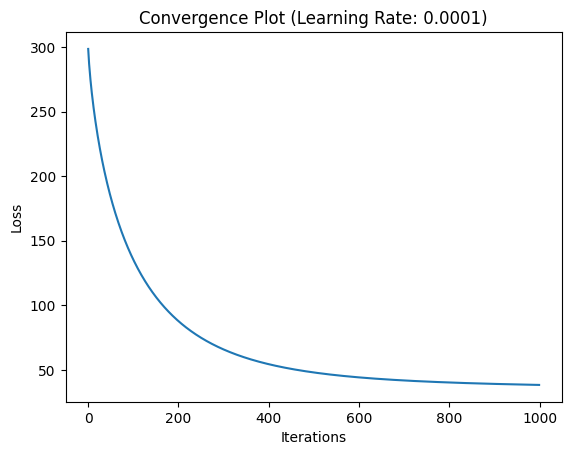

In [47]:
import sys
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt

def PlotConvergence(lr):
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=lr,max_iter=1000,verbose=1)

    old_stdout = sys.stdout
    sys.stdout = mystdout = StringIO()
    
    sgdr.fit(X_train_scaled, y_train)
    
    sys.stdout = old_stdout
    
    loss_history = mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
        if len(line.split("loss: ")) == 1:
            continue
        loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(loss_list)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title(f"Convergence Plot (Learning Rate: {lr})")
    plt.show()

PlotConvergence(0.0001)

### 3. Vary the learning rate value (0.01, 0.001, 0.0001). By comparing the convergence graphs for each model, what do you observe in terms of convergence and results?

<Figure size 400x300 with 0 Axes>

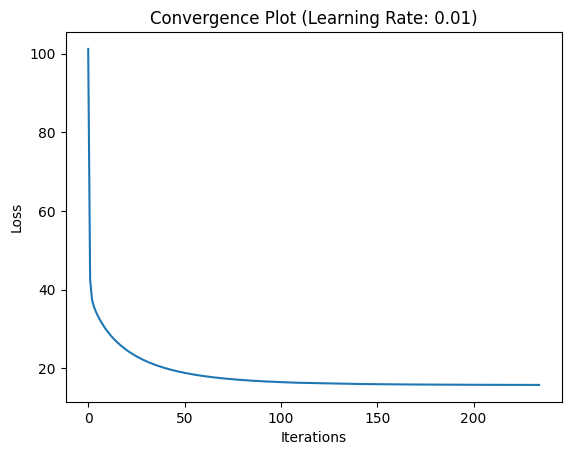

C:\Users\hafsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


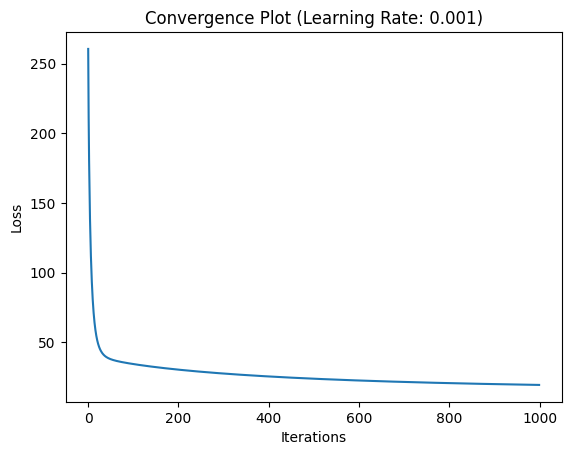

C:\Users\hafsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


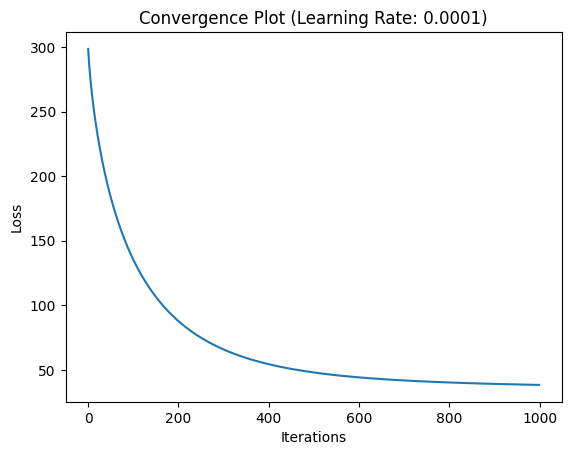

In [48]:
plt.figure(figsize=(4,3))
PlotConvergence(0.01)
PlotConvergence(0.001)
PlotConvergence(0.0001)

### 4. Why does the graph not reach the maximum number of iterations when using the 0.01 learning rate? Which variable controls this behavior?

because the model had been stopped by the tol parameter that when we compare the reduction between iterations it was so small then 
the 'tol' so automaticcaly the iterations stopped. by default tol = 1e-3 (0.001)

### 5. Display the performance of the generated models on the test set based on the following metrics: MAE, MSE, RMSE, and R-squared. Select the best model based on these metrics.

In [33]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, R-squared: {r2:.3f}")
    return mae, mse, rmse, r2

model1 = SGDRegressor(learning_rate='invscaling', eta0=0.01, max_iter=1000, tol=1e-3)
model2 = SGDRegressor(learning_rate='invscaling', eta0=0.001, max_iter=1000, tol=1e-3)
model3 = SGDRegressor(learning_rate='invscaling', eta0=0.0001, max_iter=1000, tol=1e-3)

model1.fit(X_train_scaled, y_train)
model2.fit(X_train_scaled, y_train)
model3.fit(X_train_scaled, y_train)

evaluate_model(model1,X_test_scaled,y_test)
evaluate_model(model2,X_test_scaled,y_test)
evaluate_model(model3,X_test_scaled,y_test)

MAE: 3.871, MSE: 30.947, RMSE: 5.563, R-squared: 0.578
MAE: 4.018, MSE: 34.783, RMSE: 5.898, R-squared: 0.526
MAE: 5.616, MSE: 65.913, RMSE: 8.119, R-squared: 0.101


C:\Users\hafsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\hafsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(np.float64(5.6161596413081245),
 np.float64(65.9128997213811),
 np.float64(8.118675983273448),
 0.10119324435667332)

model1 is the best model bcz it has the higher value of R-squared and the less values of RMSE and MAE.

### 6. Plot the generated plane of the best model and the scaled training data in one 3D plot. What do you observe?


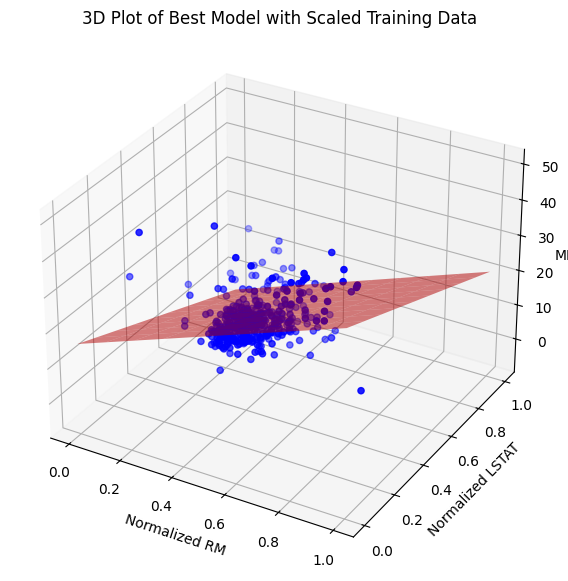

In [50]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train, c='blue', marker='o')
ax.set_xlabel('Normalized RM')
ax.set_ylabel('Normalized LSTAT')
ax.set_zlabel('MEDV')
plt.title("3D Plot of Best Model with Scaled Training Data")

xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
zz = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax.plot_surface(xx, yy, zz, color='red', alpha=0.5)
plt.show()

### 7. Predict the class of the sample shown in the following figure based on the best model.    


![MyImage](./fig.png)

In [28]:
sample = pd.DataFrame(
    [[5.71300, 22.60000]],
    columns=X_train.columns  
)
sample_scaled = scaler.transform(sample)
prediction = model1.predict(sample_scaled)
print("Predicted MEDV for the given sample:", prediction)

Predicted MEDV for the given sample: [13.475494]
